In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
CustChurn = pd.read_csv('Churn_Modelling.csv')

In [3]:
CustChurn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1,1,1.0,101348.88,1.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1,0,1.0,112542.58,0.0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3,1,0.0,113931.57,1.0
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2,0,0.0,93826.63,0.0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1,1,1.0,79084.10,0.0


In [4]:
CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9996 non-null   float64
 4   Geography        9990 non-null   object 
 5   Gender           10000 non-null  object 
 6   Age              9998 non-null   float64
 7   Tenure           9999 non-null   float64
 8   Balance          9992 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   9992 non-null   float64
 12  EstimatedSalary  9984 non-null   float64
 13  Exited           9991 non-null   float64
dtypes: float64(7), int64(4), object(3)
memory usage: 1.1+ MB


In [5]:
CustChurn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9996.000000,9998.000000,9999.000000,9992.000000,10000.000000,10000.00000,9992.000000,9984.000000,9991.000000
mean,5000.50000,1.569094e+07,650.554622,38.922885,5.012601,76499.314050,1.530200,0.70550,0.515112,100079.655450,0.203883
std,2886.89568,7.193619e+04,96.647605,10.488172,2.892251,62395.966378,0.581654,0.45584,0.499797,57520.869643,0.402904
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50957.302500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100218.210000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127651.035000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
CustChurn.shape

(10000, 14)

In [7]:
CustChurn.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         4
Geography          10
Gender              0
Age                 2
Tenure              1
Balance             8
NumOfProducts       0
HasCrCard           0
IsActiveMember      8
EstimatedSalary    16
Exited              9
dtype: int64

In [8]:
CustChurn = CustChurn.dropna(subset=('Exited'))

In [9]:
# dropping irrelevant columns
CustChurn = CustChurn.drop(['Surname','RowNumber','CustomerId'], axis= 1)

In [10]:
CustChurn.Geography.value_counts()

France     5002
Germany    2505
Spain      2474
Name: Geography, dtype: int64

In [11]:
CustChurn.isnull().sum()

CreditScore         4
Geography          10
Gender              0
Age                 2
Tenure              1
Balance             8
NumOfProducts       0
HasCrCard           0
IsActiveMember      8
EstimatedSalary    15
Exited              0
dtype: int64

In [12]:
CustChurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1,1,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1,0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3,1,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2,0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1,1,1.0,79084.10,0.0


In [13]:
CustImputer = SimpleImputer(missing_values= np.nan, strategy = 'mean')
CustImputer = CustImputer.fit(CustChurn[['Balance', 'EstimatedSalary']])
CustChurn[['Balance', 'EstimatedSalary']] = CustImputer.transform(CustChurn[['Balance', 'EstimatedSalary']])

In [14]:
CustChurn.isnull().sum()

CreditScore         4
Geography          10
Gender              0
Age                 2
Tenure              1
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      8
EstimatedSalary     0
Exited              0
dtype: int64

In [15]:
CustChurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1,1,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1,0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3,1,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2,0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1,1,1.0,79084.10,0.0


In [16]:
CustImputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
CustImputer= CustImputer.fit(CustChurn[['CreditScore', 'Geography','Age','IsActiveMember','Tenure']])
CustChurn[['CreditScore', 'Geography','Age','IsActiveMember','Tenure']] = CustImputer.transform(CustChurn[['CreditScore', 'Geography','Age','IsActiveMember','Tenure']])

In [17]:
CustChurn.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
CustChurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1,1,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1,0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3,1,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2,0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1,1,1.0,79084.10,0.0


In [19]:
CustChurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1,1,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1,0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3,1,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2,0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1,1,1.0,79084.10,0.0


C:\Users\USER\AppData\Local\Temp\ipykernel_7444\343689791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = CustChurn.corr()


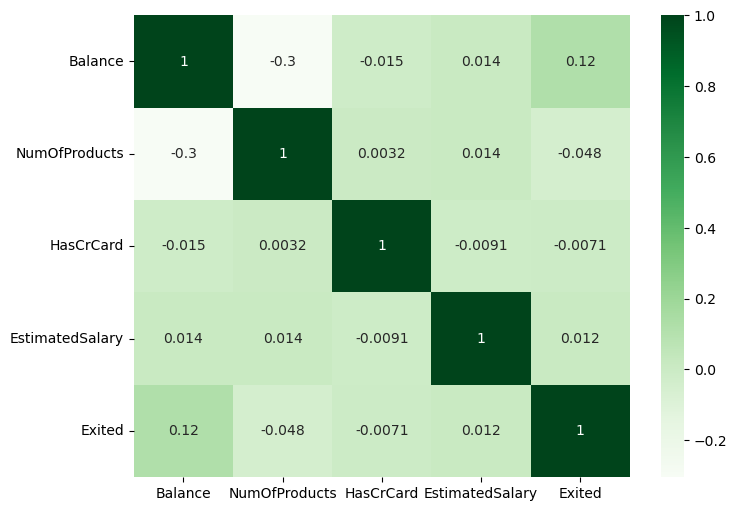

In [20]:
correlation_matrix = CustChurn.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Greens', fmt = '.2g')
plt.show()

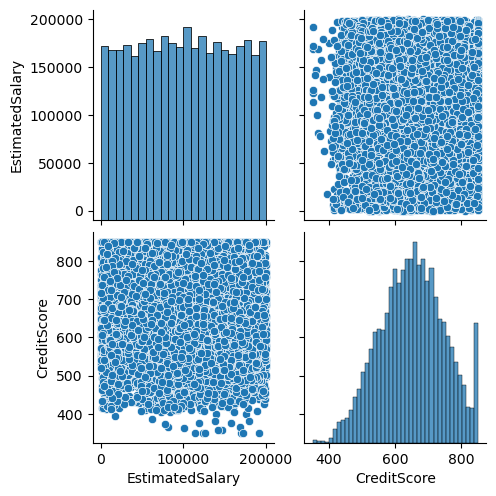

In [21]:
sns.pairplot(CustChurn.iloc[:,[9,0]])

Text(0.5, 1.0, 'Histogram of Age')

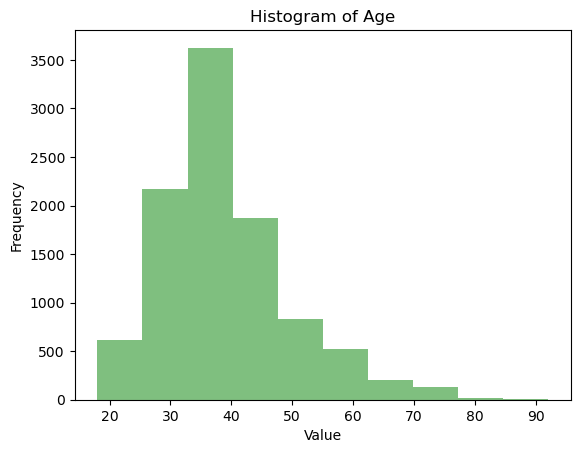

In [22]:

Age = CustChurn['Age']

# Plotting histogram for 'EstimatedSalary'
plt.hist(Age, bins=10, color='green', alpha=0.5, label='Age')

# Adding labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

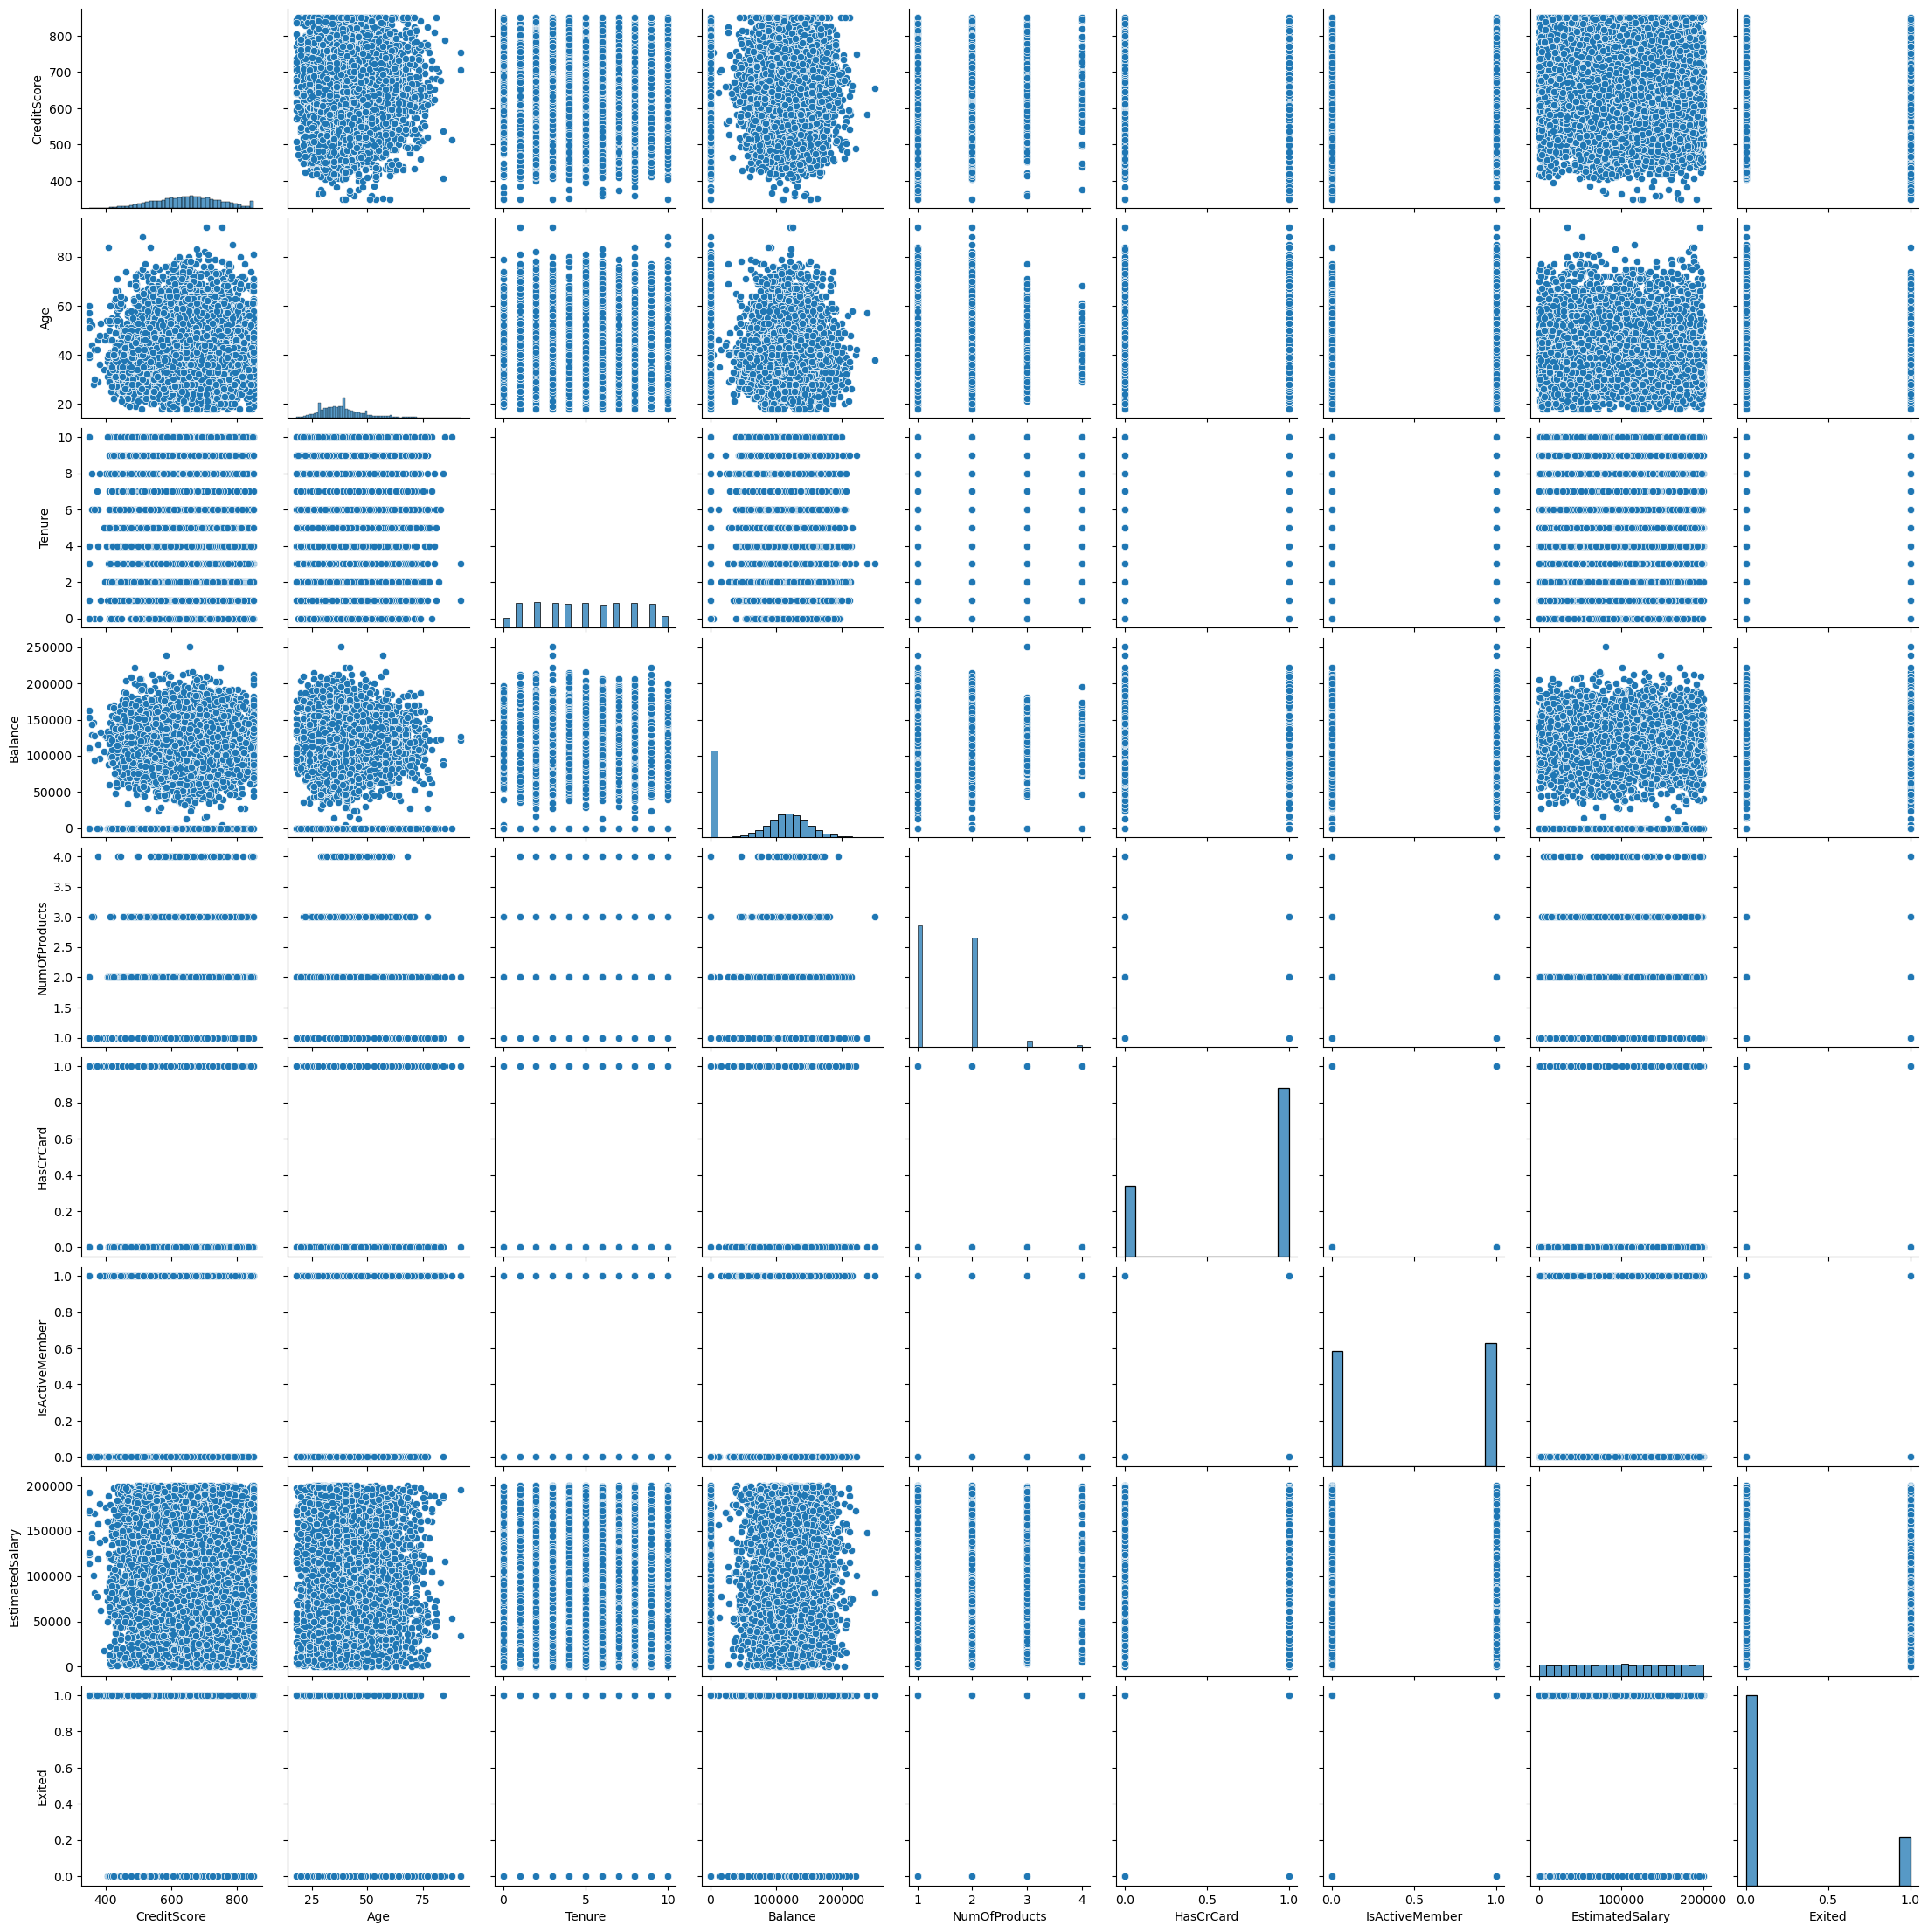

In [23]:
sns.pairplot(CustChurn)

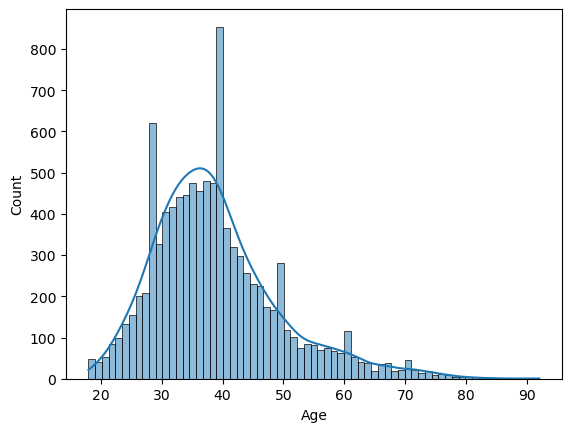

In [24]:
sns.histplot(data = CustChurn, x = 'Age', kde = True)
plt.show()

In [25]:
Labenc = LabelEncoder()
for col in CustChurn.columns:
    if CustChurn[col].dtype == 'object':
        CustChurn[col] = Labenc.fit_transform(CustChurn[col])

In [26]:
CustChurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0.00,1,1,1,101348.88,1.0
1,217,2,0,23,1,83807.86,1,0,1,112542.58,0.0
2,111,0,0,24,8,159660.80,3,1,0,113931.57,1.0
3,308,0,0,21,1,0.00,2,0,0,93826.63,0.0
4,459,2,0,25,2,125510.82,1,1,1,79084.10,0.0


In [27]:
X = CustChurn.iloc[: , :-1].values
y = CustChurn.iloc[: , -1].values

In [28]:
X

array([[2.2800000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [2.1700000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.1100000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [3.1800000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [3.8100000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [4.0100000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [29]:
CustChurn.Exited.value_counts()

0.0    7954
1.0    2037
Name: Exited, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [31]:
import imblearn
%matplotlib inline

In [32]:
from imblearn.over_sampling import SMOTE

<Axes: ylabel='count'>

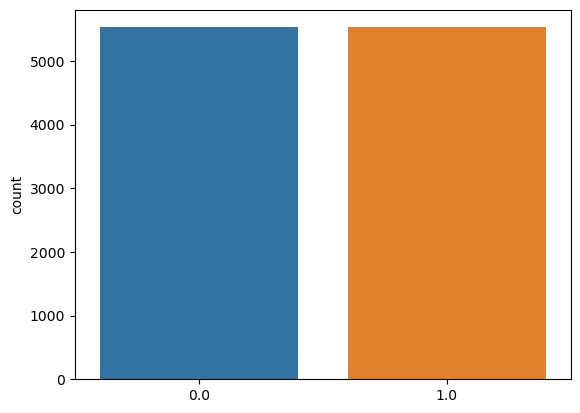

In [33]:
resampler = SMOTE(random_state = 42)
X_train_SMOTE, y_train_SMOTE = resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_SMOTE)

In [34]:
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 10 features remain


In [35]:
CustScaler = StandardScaler()
X_train_s = CustScaler.fit_transform(X_train)
X_test_s = CustScaler.transform(X_test)

In [36]:
CustTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
CustTree.fit(X_train_SMOTE,y_train_SMOTE)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
y_pred_d=CustTree.predict(X_test)
y_pred_d

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
acc_d = metrics.accuracy_score(y_test,y_pred_d)
acc_d

0.8025350233488993

In [39]:
prec_d = metrics.precision_score(y_test,y_pred_d)
prec_d

0.4835680751173709

In [40]:
recall_d = metrics.recall_score(y_test,y_pred_d)
recall_d

0.5411558669001751

In [41]:
f1_score_d =  metrics.f1_score(y_test,y_pred_d)
f1_score_d

0.5107438016528926

In [42]:
Con_met_d = metrics.confusion_matrix(y_test,y_pred_d)
Con_met_d

array([[2097,  330],
       [ 262,  309]], dtype=int64)

In [43]:
result_d = metrics.classification_report(y_test, y_pred_d)
print('Classification Report: \n')
print(result_d)

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      2427
         1.0       0.48      0.54      0.51       571

    accuracy                           0.80      2998
   macro avg       0.69      0.70      0.69      2998
weighted avg       0.81      0.80      0.81      2998



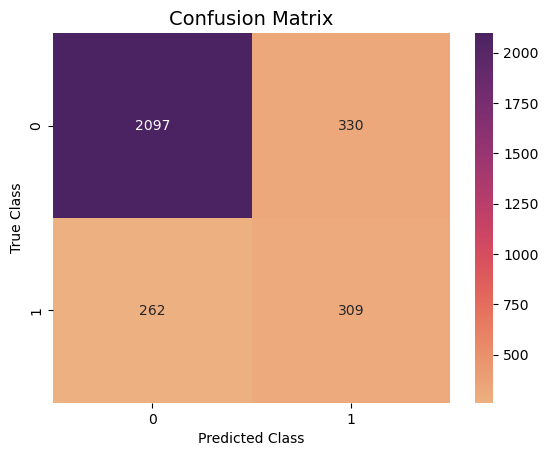

In [44]:
ax =sns.heatmap(Con_met_d, cmap = 'flare', annot= True, fmt = 'd')
plt.xlabel('Predicted Class', fontsize = 10)
plt.ylabel('True Class', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

In [45]:
model_RF=RandomForestClassifier()
model_RF.fit(X_train_SMOTE,y_train_SMOTE)


RandomForestClassifier()

In [46]:
y_pred_RF=model_RF.predict(X_test)
y_pred_RF

array([0., 1., 0., ..., 0., 0., 0.])

In [47]:
acc_RF = metrics.accuracy_score(y_test,y_pred_RF)
acc_RF

0.8635757171447632

In [48]:
prec_RF = metrics.precision_score(y_test,y_pred_RF)
prec_RF

0.7035175879396985

In [49]:
recall_RF = metrics.recall_score(y_test,y_pred_RF)
recall_RF

0.4903677758318739

In [50]:
f1_score_RF =  metrics.f1_score(y_test,y_pred_RF)
f1_score_RF

0.5779153766769866

In [51]:
Con_met_RF = metrics.confusion_matrix(y_test,y_pred_RF)
Con_met_RF

array([[2309,  118],
       [ 291,  280]], dtype=int64)

In [52]:
result_RF = metrics.classification_report(y_test, y_pred_RF)
print('Classification Report: \n')
print(result_RF)

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      2427
         1.0       0.70      0.49      0.58       571

    accuracy                           0.86      2998
   macro avg       0.80      0.72      0.75      2998
weighted avg       0.85      0.86      0.85      2998



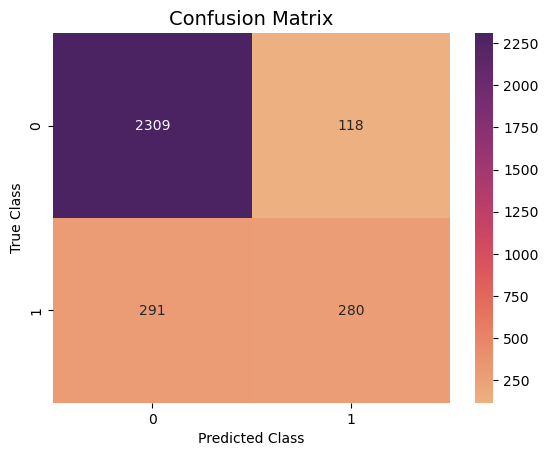

In [53]:
ax =sns.heatmap(Con_met_RF, cmap = 'flare', annot= True, fmt = 'd')
plt.xlabel('Predicted Class', fontsize = 10)
plt.ylabel('True Class', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()